## 📌 Step 3: Exploratory Data Analysis (EDA) & Risk Profiling

### Objective
Explore the statistical behavior of stock returns and volatility across companies, identify outliers, understand distributional properties, and analyze sector-level risk characteristics.

This step is **diagnostic**, not destructive—no data is removed based on visual inspection.

---

## 🔹 Dataset Preparation

### Actions Performed
- Load the processed stock dataset
- Confirm availability of engineered features:
  - Daily returns
  - Log returns
  - Rolling volatility
- Select individual stocks for deep-dive analysis

This ensures the dataset is ready for financial diagnostics.

---

## 🔹 Outlier Inspection (Daily Returns)

### Company-Level Boxplots
- Visualize daily return distributions across all companies
- Identify extreme return events

### Single-Stock Analysis (NVIDIA)
- Examine daily return outliers specific to NVIDIA
- Highlight event-driven spikes (earnings, market shocks)

### Important Note
Outliers are **not removed**, as they often represent meaningful market events rather than data errors.

---

## 🔹 Return Distribution Analysis

### Log Return Histogram (NVIDIA)
- Examine skewness and fat tails
- Confirm non-normal distribution of financial returns

This validates the use of:
- Log returns
- Robust modeling approaches

---

## 🔹 Rolling Statistics (Price Non-Stationarity)

### Rolling Mean & Standard Deviation
- Visualize 30-day rolling mean and standard deviation of prices
- Demonstrate:
  - Non-stationary price behavior
  - Volatility clustering over time

This supports modeling returns and volatility instead of raw prices.

---

## 🔹 Cross-Company Return Behavior

### Distribution of Mean Daily Returns
- Analyze how average returns vary across companies
- Observe clustering near zero with few strong outliers

This reflects realistic equity market behavior.

---

## 🔹 Cross-Company Volatility Analysis

### Annualized Volatility Distribution
- Compute and visualize annualized volatility per company
- Identify high-risk and low-risk stocks

This enables:
- Risk stratification
- Volatility-based comparisons

---

## 🔹 Risk–Return Profiling

### Scatter Plot Analysis
- Plot mean daily return vs annualized volatility
- Highlight:
  - Risk–return trade-offs
  - High-risk/low-return outliers
  - Stocks with favorable risk-adjusted profiles

This visualization aligns with portfolio theory principles.

---

## 🔹 Sector-Level Volatility Analysis

### Sector Mapping
- Map selected companies to economic sectors
- Merge sector labels into the dataset

### Sector Volatility Metrics
- Compute annualized volatility by sector
- Rank sectors by risk level

### Sector-wise Distribution Plots
- Boxplots of log return distributions by sector
- Compare defensive vs cyclical sectors

This provides macro-level insights into market structure.

---

## 🔹 Exporting Model-Ready Dataset

### Output
- Dataset with sector labels saved as `model_data.csv`

### Purpose
- Preserve EDA-enriched dataset
- Ensure consistent input for forecasting and modeling notebooks
- Improve reproducibility and workflow efficiency

---

## ✅ Outcome of This Step
- Clear understanding of return and volatility behavior
- Identification of risk characteristics across stocks and sectors
- Dataset validated and prepared for forecasting models

This step completes **exploratory analysis and risk diagnostics**, forming the analytical foundation for time-series modeling.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv(r"C:\Users\AVI SHARMA\Documents\Project1\all_stocks_processed.csv")
data.head()

,Date,Open,High,Low,Close,Adjusted_Close,Volume,Company,Daily_Return,Log_Return,Rolling_Volatility_30D
0,2015-01-02,137.717392,138.026749,136.061874,137.173920,96.108543,2531214,3M,NaN,NaN,NaN
1,2015-01-05,136.287628,136.822739,133.846161,134.080261,93.941048,4416708,3M,-0.022553,-0.022811,NaN
2,2015-01-06,134.464890,134.924744,131.889633,132.650497,92.939293,4224272,3M,-0.010664,-0.010721,NaN
3,2015-01-07,133.695648,134.013382,132.892975,133.612045,93.612984,3685235,3M,0.007249,0.007223,NaN
4,2015-01-08,134.322739,136.864548,134.214050,136.814377,95.856667,3758908,3M,0.023968,0.023685,NaN


<Figure size 640x480 with 0 Axes>

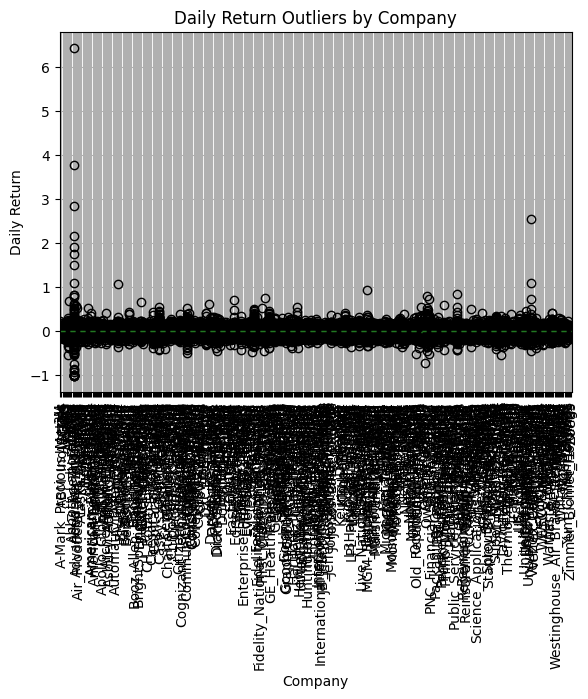

In [2]:
plt.figure()
data.boxplot(
    column="Daily_Return",
    by="Company",
    rot=90
)
plt.title("Daily Return Outliers by Company")
plt.suptitle("")
plt.ylabel("Daily Return")
plt.show()

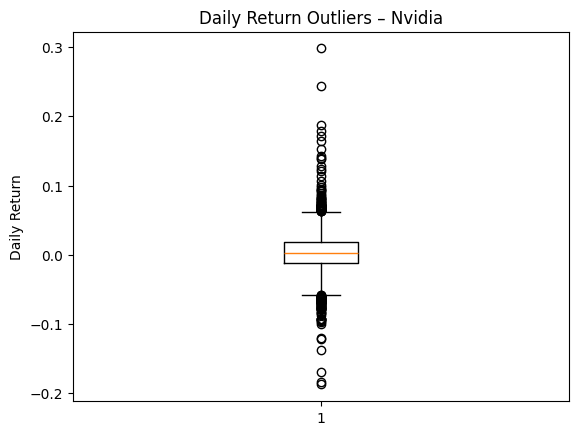

In [3]:
single_stock = data[data["Company"] == "Nvidia"]
plt.figure()
plt.boxplot(single_stock["Daily_Return"].dropna())
plt.title("Daily Return Outliers – Nvidia")
plt.ylabel("Daily Return")
plt.show()

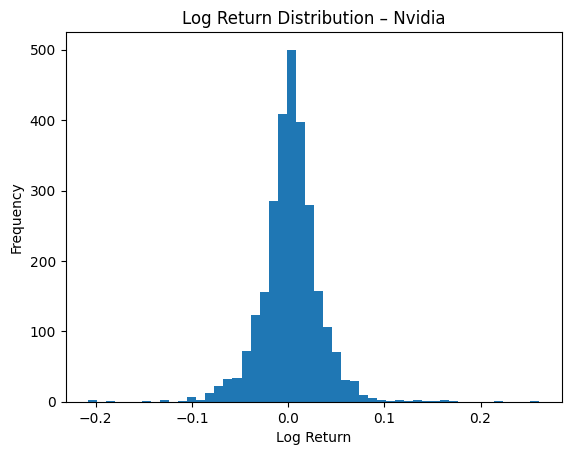

In [4]:
plt.figure()
plt.hist(single_stock["Log_Return"].dropna(), bins=50)
plt.title("Log Return Distribution – Nvidia")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

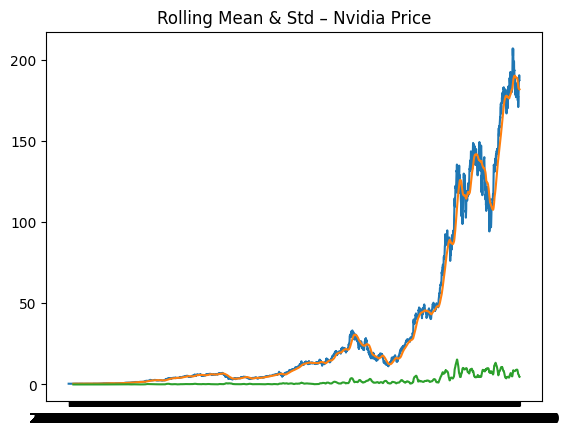

In [5]:
rolling_mean = single_stock["Adjusted_Close"].rolling(30).mean()
rolling_std = single_stock["Adjusted_Close"].rolling(30).std()

plt.figure()
plt.plot(single_stock["Date"], single_stock["Adjusted_Close"])
plt.plot(single_stock["Date"], rolling_mean)
plt.plot(single_stock["Date"], rolling_std)
plt.title("Rolling Mean & Std – Nvidia Price")
plt.show()

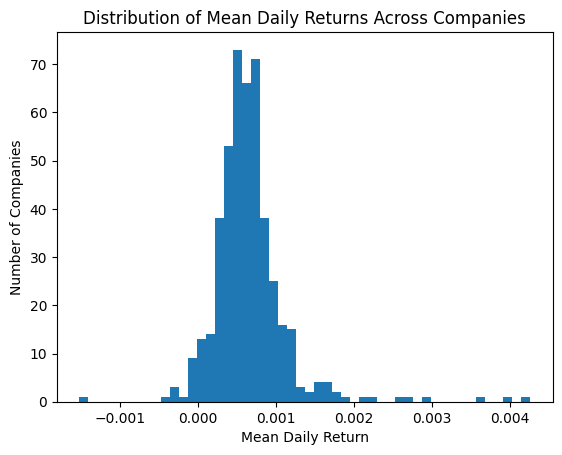

In [6]:
mean_returns = (
    data.groupby("Company")["Daily_Return"]
      .mean()
      .dropna()
)

plt.figure()
plt.hist(mean_returns, bins=50)
plt.title("Distribution of Mean Daily Returns Across Companies")
plt.xlabel("Mean Daily Return")
plt.ylabel("Number of Companies")
plt.show()

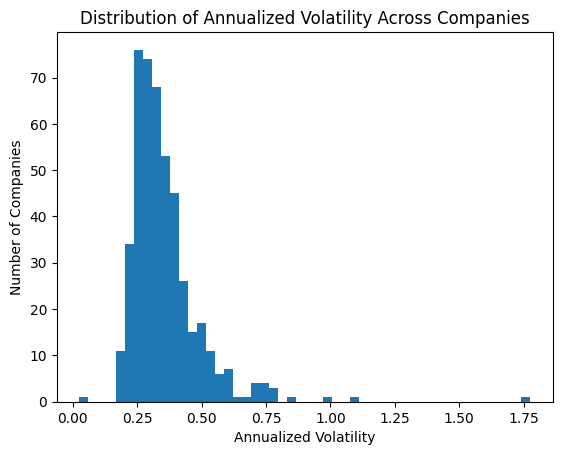

In [7]:
annualized_vol = (
    data.groupby("Company")["Log_Return"]
      .std()
      .mul(np.sqrt(252))
      .dropna()
)

plt.figure()
plt.hist(annualized_vol, bins=50)
plt.title("Distribution of Annualized Volatility Across Companies")
plt.xlabel("Annualized Volatility")
plt.ylabel("Number of Companies")
plt.show()

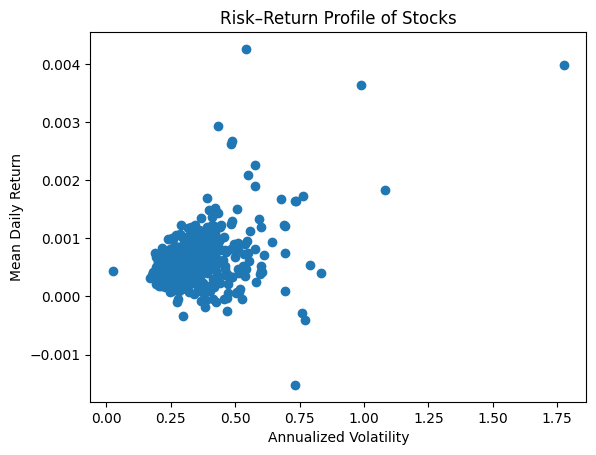

In [8]:
risk_return = (
    data.groupby("Company")
      .agg(
          mean_return=("Daily_Return", "mean"),
          volatility=("Log_Return", lambda x: x.std() * np.sqrt(252))
      )
      .dropna()
)

plt.figure()
plt.scatter(
    risk_return["volatility"],
    risk_return["mean_return"]
)
plt.xlabel("Annualized Volatility")
plt.ylabel("Mean Daily Return")
plt.title("Risk–Return Profile of Stocks")
plt.show()

In [9]:
sector_map = {
    "Apple": "Technology",
    "Microsoft": "Technology",
    "Nvidia": "Technology",
    "Advanced_Micro_Devices": "Technology",
    "Tesla": "Consumer_Discretionary",
    "Amazon": "Consumer_Discretionary",
    "Walmart": "Consumer_Staples",
    "Exxon_Mobil": "Energy",
    "Chevron": "Energy",
    "JPMorgan_Chase": "Financials",
    "Bank_of_America": "Financials",
    "UnitedHealth_Group": "Healthcare",
    "Johnson_and_Johnson": "Healthcare"
}

sector_df = pd.DataFrame(
    sector_map.items(),
    columns=["Company", "Sector"]
)

In [10]:
data = data.merge(sector_df, on="Company", how="left")

In [11]:
sector_volatility = (
    data.dropna(subset=["Sector"])
      .groupby("Sector")["Log_Return"]
      .std()
      .mul(np.sqrt(252))
      .sort_values(ascending=False)
)

sector_volatility

Sector
Consumer_Discretionary    0.468651
Technology                0.425341
Financials                0.289804
Energy                    0.283930
Healthcare                0.242815
Consumer_Staples          0.214977
Name: Log_Return, dtype: float64

<Figure size 640x480 with 0 Axes>

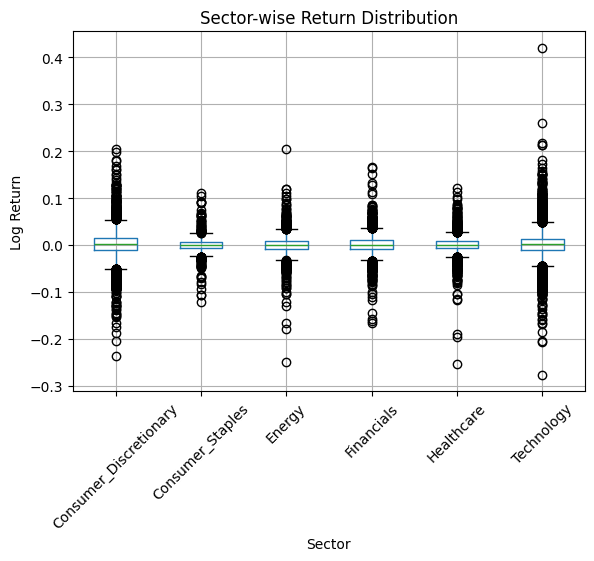

In [12]:
plt.figure()
data.dropna(subset=["Sector"]).boxplot(
    column="Log_Return",
    by="Sector",
    rot=45
)
plt.title("Sector-wise Return Distribution")
plt.suptitle("")
plt.xlabel("Sector")
plt.ylabel("Log Return")
plt.show()

In [14]:
output_dir = r"C:\Users\AVI SHARMA\Documents\Project1\data\processed"
import os
os.makedirs(output_dir, exist_ok=True)
processed_path = os.path.join(output_dir, "model_data.csv")

data.to_csv(processed_path, index=False)
print("Saved:", processed_path)

Saved: C:\Users\AVI SHARMA\Documents\Project1\data\processed\model_data.csv
